# Enfoque clásico

### Extracción de características manualmente

* Conocimiento del dominio (de negocio).
* Definir las features (y métodos).
* Procesamiento.

<img src="images/manual_feture_ext.png" alt="Drawing" style="width: 600px;"/>



### Preprocesamiento

<img src="images/cat_preprocess.png" alt="Drawing" style="width: 800px;"/>


# CNN

Como vimos en la teoría, las redes convolucionales son un tipo de red neuronal que básicamente puede recordar información espacial. Para eso, la clave es: aplicar una serie de diferentes filtros de imagen (kernels) a la imagen de entrada.

Los filtros nos permiten detectar cambios en la intensidad de una imagen, observar grupos de píxeles y "reaccionar" a patrones alternos de píxeles oscuros/claros, lo que produce una salida que muestra bordes de objetos y texturas diferentes.

### Operación de convolución

La convolución está definida por los resultante de:
- Multiplicación por elementos del filtro convolucional y una porción de una matriz de entrada. (La porción de la matriz de entrada tiene el mismo rango y tamaño que el filtro convolucional).
- Suma de todos los valores en la matriz de productos resultante.

### Stride

Es la cantidad de píxeles sobre el que se desplaza el filtro. Casi siempre se usan de tamaño (1, 1). Cuanto mas grande, mas se reduce el tamaño de la imagen (mapa de características). Si es mas grande, se suele compensar con padding.

<img src="images/stride.png" alt="Drawing" style="width: 500px;"/>

### Padding

El padding le da mas libertad al filtro ya que tiene más espacio para moverse al rellenar ceros en el borde de la imagen.

Es especialmente útil cuando queremos "guardar" información de los bordes y esquinas.

<img src="images/pre_padding.png" alt="Drawing" style="width: 400px;"/>

<img src="images/padding.png" alt="Drawing" style="width: 400px;"/>

### Pooling

Reducir una matriz (o matrices) creada por una capa convolucional anterior a una matriz más pequeña. El pooling (agrupación) implica tomar el valor máximo (max pooling) o promedio en el área agrupada (avg pooling).

Un problema de los mapas de características de las capas convolucionales es que registran la posición precisa de las características en la entrada. Por tanto un pequeño cambio en la señal de entrada, da un mapa de características totalmente diferente.

Desde el punto de vista de procesamiento de señales, la idea es crear una versión de menor resolución de la señal de entrada que aún contiene los elementos estructurales grandes o importantes, sin los detalles finos que pueden no ser tan útiles para la tarea.

La capa de pooling va luego de la capa convolucional, y es un patrón común utilizado para ordenar capas dentro de una red neuronal convolucional que puede repetirse una o más veces en un modelo dado.

La capa de agrupación opera sobre cada mapa de características por separado para crear un nuevo conjunto del mismo número de mapas de características agrupadas.



**En concreto:**
* La agrupación ayuda a reforzar la invariancia traslacional en la matriz de entrada.
* La agrupación para aplicaciones de visión se conoce más formalmente como agrupación espacial. De manera menos formal, la agrupación a menudo se denomina submuestreo o submuestreo.

Generalmente va, 

1. Imagen de entrada - x
2. Capa convolucional - conv(x)
3. No linealidad - relu(output_conv)
4. Pooling - maxpooling(output_relu)

**Ejemplo:** MaxPool

Pooling size: 2x2 con un stride de 1x1.

<img src="images/pooling.svg" alt="Drawing" style="width: 400px;"/>


In [2]:
%pip install pytorch

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/private/var/folders/36/xhls1xbs1676nkndj0s_rtnr0000gn/T/pip-install-cojyuw2_/pytorch_71eabc297a7b47379be33b10bf85746a/setup.py", line 15, in <module>
          raise Exception(message)
      Exception: You tried to install "pytorch". The package named for PyTorch is "torch"
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
  Running setup.py install for pytorch ... error
  error: subprocess-exited-with-error
  
  × Running setup.py install for pytorch did not run successfully.
  │ exi

### Convolución en PyTorch

In [1]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'torch'

In [2]:
dataiter = iter(train_loader)
images, _ = dataiter.next()

NameError: name 'train_loader' is not defined

In [ ]:
img = np.squeeze(images[7])

fig = plt.figure(figsize = (12, 12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')

In [36]:
img.shape

torch.Size([28, 28])

In [4]:
import torch
import torch.nn as nn

In [5]:
# nn.Conv2d?

In [6]:
conv = nn.Conv2d(
    in_channels=1,
    out_channels=8,
    kernel_size=(5,5),
    stride=(1,1),
    padding=0,
)

In [7]:
conv.weight.shape

torch.Size([8, 1, 5, 5])

In [48]:
conv.bias.size()

torch.Size([8])

<img src="images/tamanio_dsp_conv.png" alt="Drawing" style="width: 600px;"/>


In [105]:
((28 - 5 + 2*0) / 1) + 1

24.0

### Problemas de la CNN?

* No es invariante al escalamiento, rotación, traslación.
    --> Las capas de pooling pueden ayudar con la invariación local.

<img src="images/translation_invariance.png" alt="Drawing" style="width: 600px;"/>


##### Problemas de agregar muchas capas de Pooling

* Tal vez para problemas de clasificación no importe tanto, pero donde la posición relativa importa...?

<img src="images/pooling_problem.png" alt="Drawing" style="width: 600px;"/>


## LeNet

http://www.dengfanxin.cn/wp-content/uploads/2016/03/1998Lecun.pdf

* Cuántas capas tiene?

<img src="images/cnn_lenet5.png" alt="Drawing" style="width: 800px;"/>


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt

from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

from utils import train_model, compute_confusion_matrix

from plot_utils import plot_training_loss, plot_accuracy, show_examples, plot_confusion_matrix

In [6]:
NUM_EPOCAS = 10
valid_size = 0.2
batch_size = 1

transform = transforms.ToTensor()

train_data = datasets.MNIST(root='data', 
                            train=True,
                            download=True, 
                            transform=transform)

test_data = datasets.MNIST(root='data',
                           train=False,
                           download=True,
                           transform=transform)

# esto es el workflow de test train split en el mundo del deep learning parece
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train)) # size of the validation set
train_idx, valid_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=batch_size,
                                           sampler=train_sampler,
                                           num_workers=0)

valid_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=batch_size,
                                           sampler=valid_sampler,
                                           num_workers=0)

test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=batch_size,
                                          num_workers=0)

<img src="images/cnn_lenet5.png" alt="Drawing" style="width: 800px;"/>


In [7]:
class LeNet5(nn.Module):

    def __init__(self, n_canales, n_clases):
        super().__init__()
        
        self.n_canales = n_canales
        self.n_clases = n_clases
        
        # le net tiene dos capas convolucionales
        self.conv1 = nn.Conv2d(self.n_canales, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        # que luego se conectan a 3 capas fully conected (perceptrones multi capa)
        self.fc1 = torch.nn.Linear(256, 120)
        self.fc2 = torch.nn.Linear(120, 84)
        self.fc3 = torch.nn.Linear(84, self.n_clases)

#         self.features = nn.Sequential(
#             nn.Conv2d(self.n_canales, 6, kernel_size=5),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2),
#             nn.Conv2d(6, 16, kernel_size=5),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2)
#         )

#         self.classifier = torch.nn.Sequential(
#             torch.nn.Linear(256, 120),
#             nn.ReLU(),
#             torch.nn.Linear(120, 84),
#             nn.ReLU(),
#             torch.nn.Linear(84, self.n_clases),
#         )


    def forward(self, x):
        # Primera capa convolucional. convolucion --> relu --> pooling
        x = self.conv1(x) # convolucion
        x = F.max_pool2d(F.relu(x), (2, 2)) # relu y luego pooling, one liner
        # segunda capa convolucional 
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2)) # todo en una misma linea pero el orden es el mismo, conv relu pool
        # vectorizo mis imagenes
        x = torch.flatten(x, 1)
        # capas de perceptrones 1,2 y 3
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        print(x.shape)
        # output
        return x

In [8]:
model = LeNet5(n_canales=1, n_clases=10)
model = model.to('cpu')

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [9]:
minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCAS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device='cpu',
    log_interval_batch=200)# que es el minibatch_loss_list?

torch.Size([1, 10])
salida prop adelante tensor([[ 0.0540, -0.0454,  0.0311, -0.0391,  0.0567, -0.1336,  0.0175, -0.0575,
         -0.0284,  0.0201]], grad_fn=<AddmmBackward0>)
Targets tensor([4])
Epoca: 001/010 | Batch 0000/48000 | Loss: 2.2350
torch.Size([1, 10])
salida prop adelante tensor([[ 0.0392, -0.0508,  0.0240, -0.0439,  0.1838, -0.1392, -0.0104, -0.0745,
         -0.0333,  0.0180]], grad_fn=<AddmmBackward0>)
Targets tensor([4])
torch.Size([1, 10])
salida prop adelante tensor([[ 0.0138, -0.0709,  0.0296, -0.0285,  0.3538, -0.1571, -0.0145, -0.0878,
         -0.0164, -0.0027]], grad_fn=<AddmmBackward0>)
Targets tensor([3])
torch.Size([1, 10])
salida prop adelante tensor([[-0.0053, -0.0747,  0.0041,  0.0854,  0.3127, -0.1740, -0.0234, -0.0985,
         -0.0366, -0.0210]], grad_fn=<AddmmBackward0>)
Targets tensor([1])
torch.Size([1, 10])
salida prop adelante tensor([[-0.0083,  0.0808, -0.0125,  0.0783,  0.2863, -0.1814, -0.0439, -0.1040,
         -0.0707, -0.0362]], grad_fn=<Add

KeyboardInterrupt: 

In [ ]:
plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCAS,
                   iter_per_epoch=len(train_loader),
                   averaging_iterations=100)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list)
plt.ylim([80, 100])
plt.show()

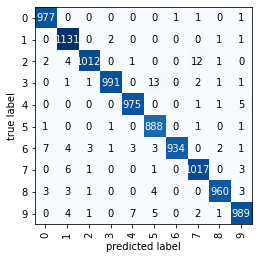

In [110]:

clases = {
    0: '0',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9'
}

mat = compute_confusion_matrix(model=model, data_loader=test_loader, device=torch.device('cpu'))
plot_confusion_matrix(mat, class_names=clases.values())
plt.show()

## AlexNet

Arquitectura finalista en el concurso ImageNet (2012). 1M de imagenes, 20k clases.

<img src="images/comp_alex_le.png" alt="Drawing" style="width: 800px;"/>


In [63]:
# TODO

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms

import numpy as np
import matplotlib.pyplot as plt

from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

from utils import train_model, compute_confusion_matrix

from plot_utils import plot_training_loss, plot_accuracy, show_examples, plot_confusion_matrix

In [69]:
NUM_EPOCAS = 10
valid_size = 0.2
batch_size = 10

transform = transforms.ToTensor()

train_data = datasets.CIFAR10(root='data', 
                            train=True,
                            download=True, 
                            transform=transform)

test_data = datasets.CIFAR10(root='data',
                           train=False,
                           download=True,
                           transform=transform)


num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=batch_size,
                                           sampler=train_sampler,
                                           num_workers=0)

valid_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=batch_size,
                                           sampler=valid_sampler,
                                           num_workers=0)

test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=batch_size,
                                          num_workers=0)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [97]:
train_loader.dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

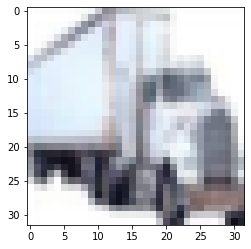

In [95]:
img = next(iter(train_loader))[0][0]
plt.imshow(transforms.ToPILImage()(img))

In [99]:
# TODO implementacion arquitectura

## Problemas en Deep Learning

#### Vanishing Gradient

* La derivada se hace muy pequeña a medida que aumentamos capas por la retropropagación. Cuando se actualizan los pesos de la red, los valores son muy pequeños (-> 0), por lo que detiene el entrenamiento de la red o lleva mucho tiempo.. 
* Ver de cambiar función de activación.

#### Exploding Gradient

Caso contrario al anterior, pero no depende de la función de activación si no de los pesos. Por lo tanto, puede no llegar a converger nunca.


<img src="images/vanishing.png" alt="Drawing" style="width: 600px;"/>
